# Linear Regression and other Machine Learning and Deep Learning Methods

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#EDA
#baseline
#Linear Regression
#PCA
#Linear Regression again
#Neural Networks

## EDA

In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

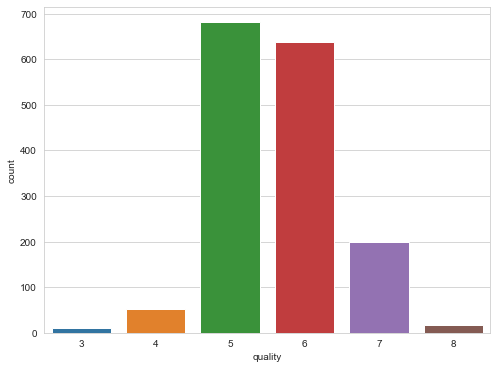

In [7]:
plt.figure(figsize= (8,6))
sns.countplot(x= 'quality', data= df);

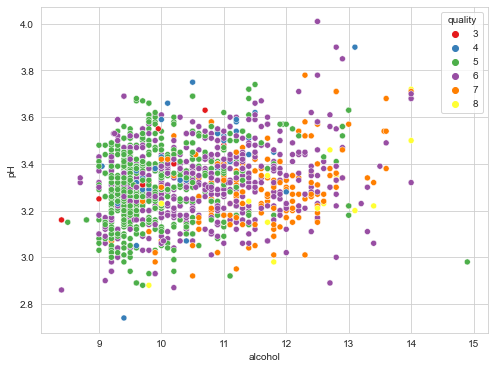

In [8]:
plt.figure(figsize= (8,6))
sns.scatterplot(x= 'alcohol', y= 'pH', hue= 'quality', data= df, 
                palette = 'Set1');

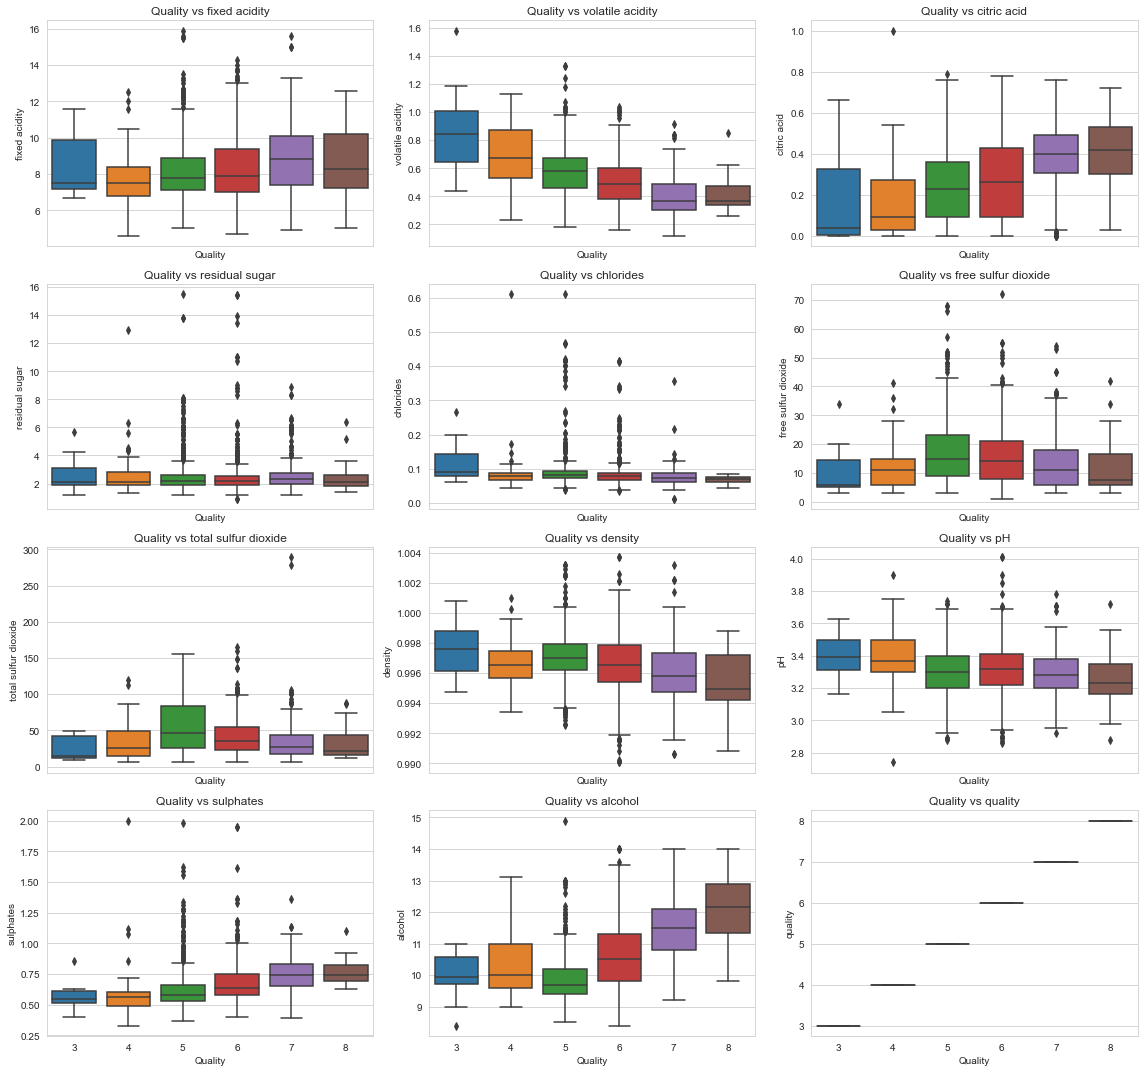

In [9]:
# check outliers?
fig, axes = plt.subplots(nrows= 4, ncols= 3, figsize= (16, 15), sharex= True)

for ax, column in zip(axes.flatten(), df.columns):
    sns.boxplot(x= df['quality'], y= df[column], ax= ax)
    ax.set_title(f'Quality vs {column}')
    ax.set_xlabel('Quality')
    ax.set_ylabel(column)
    
fig.tight_layout();

In [10]:
# sns.pairplot(df, hue= 'quality');

Looks like residual sugar and chlorides have the most outliers, while citric acid has very few.

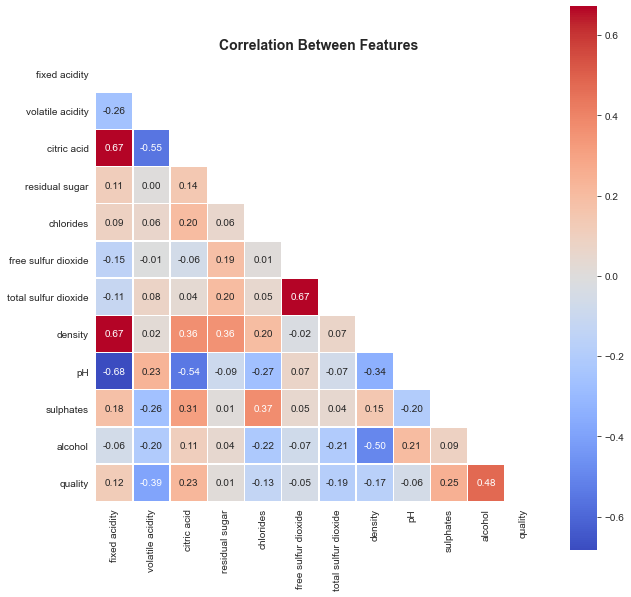

In [11]:
# check for multicollinearity
corr = df.corr()

plt.figure(figsize= (10,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap= 'coolwarm', mask= mask, linewidths= .5, square= True, 
            annot= True, fmt= '.2f')
plt.title('Correlation Between Features', weight= 'bold', fontsize= 14);

None of the features are correlated past +/- 0.7. This shows that some are correlated, but not enough to remove them from our prediction.

## Linear Regression

In [12]:
y = df['quality']
X = df.drop('quality', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 27)

In [13]:
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [14]:
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [15]:
print(y_train.shape)
print(y_test.shape)

(1279,)
(320,)


In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
train_pred = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

In [17]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# returns R-squared
linreg.score(X_test, y_test)

0.4254015371788503

In [19]:
linreg.intercept_

17.735332713961128

In [20]:
# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))
# The root mean squared error
print('Root mean squared error: %.4f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [ 2.79601096e-02 -1.17136493e+00 -2.26827210e-01  2.41581706e-02
 -1.90216128e+00  3.27759536e-03 -3.05983039e-03 -1.38742997e+01
 -3.08876985e-01  9.23702005e-01  2.66576063e-01]
Mean squared error: 0.3575
Coefficient of determination: 0.4254
Root mean squared error: 0.5980


In [21]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1541,7.4,0.250,0.29,2.20,0.054,19.0,49.0,0.99666,3.40,0.76,10.9
1331,7.8,0.870,0.26,3.80,0.107,31.0,67.0,0.99668,3.26,0.46,9.2
1311,6.5,0.510,0.15,3.00,0.064,12.0,27.0,0.99290,3.33,0.59,12.8
467,8.8,0.460,0.45,2.60,0.065,7.0,18.0,0.99470,3.32,0.79,14.0
1181,9.8,0.390,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4
...,...,...,...,...,...,...,...,...,...,...,...
1219,9.0,0.390,0.40,1.30,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
602,7.7,0.835,0.00,2.60,0.081,6.0,14.0,0.99750,3.30,0.52,9.3
1315,7.5,0.630,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8


In [22]:

# plt.figure(figsize= (8,8))
# plt.scatter(X_test, y_test, color= 'black')
# sns.scatterplot(x= X_test, y= y_test)
# plt.plot(X_test, y_pred, color= 'blue', linewidth= 3)

In [23]:
# Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)


In [24]:
y_train.shape

(1279,)

In [25]:
y_pred.shape

(320,)

In [26]:
y.shape

(1599,)

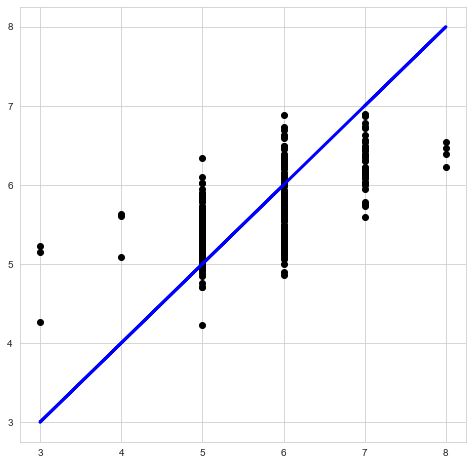

In [27]:
plt.figure(figsize= (8,8))
plt.scatter(y_test, y_pred, color= 'black')
# sns.scatterplot(x= X_test, y= y_test)
plt.plot(y_train, y_train, color= 'blue', linewidth= 3);

###  Using StatsModels

In [28]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [29]:
df_train = pd.concat([X_train, y_train], axis= 1)

In [30]:
y = df_train['quality']
X = df_train.drop('quality', axis= 1)

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     60.22
Date:                Sun, 13 Jun 2021   Prob (F-statistic):          1.27e-107
Time:                        17:36:59   Log-Likelihood:                -1278.6
No. Observations:                1279   AIC:                             2581.
Df Residuals:                    1267   BIC:                             2643.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.7353     24.102      0.736      0.462     -29.549      65.020
fixed acidity            0.0280      0.029      0.963      0.336      -0.029       0.085
volatile acidity        -1.1714      0.139     -8.452      0.000      -1.443      -0.899
citric acid             -0.2268      0.164     -1.383      0.167      -0.549       0.095
residual sugar           0.0242      0.016      1.494      0.135      -0.008       0.056
chlorides               -1.9022      0.474     -4.012      0.000      -2.832      -0.972
free sulfur dioxide      0.0033      0.002      1.328      0.185      -0.002       0.008
total sulfur dioxide    -0.0031      0.001     -3.755      0.000      -0.005      -0.001
density                -13.8743     24.601     -0.564      0.573     -62.137      34.388
pH                      -0.3089      0.220     -1.403      0.161      -0.741       0.123
sulphates                0.9237      0.128      7.222      0.000       0.673       1.175
alcohol                  0.2666      0.031      8.738      0.000       0.207       0.326
==============================================================================
Omnibus:                       21.561   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.099
Skew:                          -0.161   Prob(JB):                     1.07e-07
Kurtosis:                       3.707   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

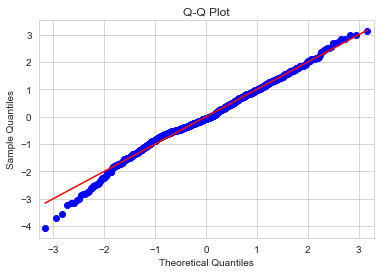

In [31]:
from scipy import stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='r', fit=True)
plt.title('Q-Q Plot')
fig.show();

### VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [vif(X.values, i) for i in range(len(X.columns))]

print (vif_data[vif_data['VIF'] >= 5])

                 feature          VIF
0          fixed acidity    70.633255
1       volatile acidity    17.077331
2            citric acid     8.801875
4              chlorides     6.449153
5    free sulfur dioxide     6.361659
6   total sulfur dioxide     6.287636
7                density  1489.381529
8                     pH  1089.822603
9              sulphates    20.863749
10               alcohol   128.605711


### PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components= 2, random_state= 27)
pca.fit(X)

PCA(n_components=2, random_state=27)

In [35]:
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.94615355 0.0485534 ]
[1207.12633563  273.45238802]


In [36]:
# average log-likelihood of all samples
pca.score(X)

-19.608793353774647

In [37]:
pca.score_samples(X)

array([-15.20654562, -16.40884976, -23.25234328, ..., -15.30460443,
       -20.29425287, -43.85524784])

In [38]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'random_state': 27,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [39]:
from sklearn.cross_decomposition import PLSRegression
#  Partial Least Squares Regression
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

PLSRegression(n_components=1)

In [40]:
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PLS r-squared 0.400


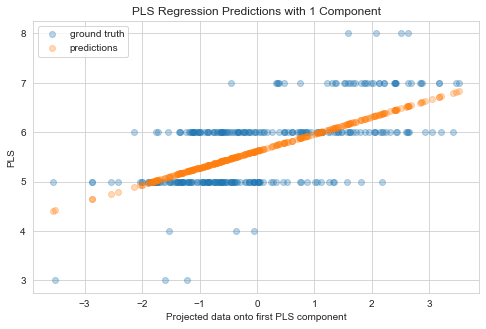

In [41]:
# seen on sci-kit learn
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
plt.figure(figsize= (8, 5))
plt.scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
plt.scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
plt.xlabel('Projected data onto first PLS component')
plt.ylabel('PLS')
plt.title('PLS Regression Predictions with 1 Component')
plt.legend()
plt.show()

In [42]:
#  Partial Least Squares Regression with 3 components
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PLS r-squared 0.420


In [43]:
#  Principal Component Regression
from sklearn.pipeline import make_pipeline
pca_2 = make_pipeline(PCA(n_components=6), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 6 components {pca_2.score(X_test, y_test):.3f}")

PCR r-squared with 6 components 0.413


* Original R-squared was 0.425 with 10 features
* PCA was able to get to 0.413 with 6 features
* PLS was able to get to 0.42 with only 3 components

## Remove Outliers

## Bin "Quality"

In [44]:
# bin quality into 'good', 'better', 'best' and predict that?
# having quality turned into number instead of word skips a step later
bins = (2.9, 4.9, 6.9, 8)
classes = [0, 1, 2]
df['qual'] = pd.cut(df['quality'], bins= bins, labels= classes)

In [45]:
df[df['quality'] == 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,0
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,0
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,0
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3,0
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,0
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,0
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3,0
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3,0
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,0
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,0


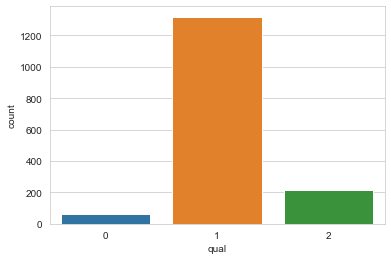

In [46]:
sns.countplot(x= 'qual', data= df);

In [47]:
# see where NaN values are
df[df.isnull().any(axis=1)] # there aren't any!

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual


There is very large class imbalance that will have to be taken into account.

### Linear Regression

In [48]:
y = df['qual']
X = df.drop(['qual', 'quality'], axis= 1)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state= 27)

In [50]:
binned_linreg = LinearRegression()
binned_linreg.fit(xtrain, ytrain)
train_pred = binned_linreg.predict(xtrain)
y_pred = binned_linreg.predict(xtest)

In [51]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(ytest, y_pred))
# The root mean squared error
print('Root mean squared error: %.4f'
      % np.sqrt(mean_squared_error(ytest, y_pred)))

Coefficient of determination: 0.2900
Root mean squared error: 0.3203


### Machine Learning

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
stscal = StandardScaler()

In [54]:
y = df['qual']
x = df.drop(['quality', 'qual'], axis= 1)

In [55]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: qual, Length: 1599, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size= .2, random_state= 27)

In [58]:
Xtrain = stscal.fit_transform(Xtrain)
Xtest = stscal.fit_transform(Xtest)

In [59]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
train_pred = logreg.predict(Xtrain)
ypred = logreg.predict(Xtest)